In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [3]:
random_state = 3

dic = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

In [4]:
df = pd.read_csv('archive/fashion-mnist_train.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


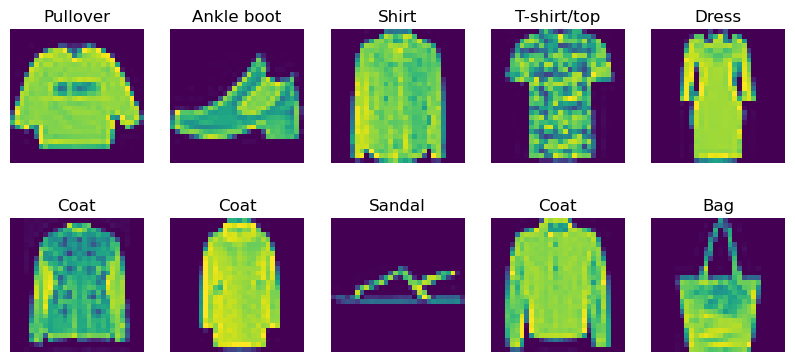

In [5]:
fig, axs = plt.subplots(2, 5, figsize=(10, 4.5))
axs = axs.flatten()

for ax, img, target in zip(axs, df.iloc[:, 1:].to_numpy(), df['label']):
    ax.title.set_text(dic[target])    
    ax.imshow(img.reshape((28, 28)))
    ax.axis('off')

In [6]:
X, y = df.iloc[:, 1:].to_numpy(), df['label'].to_numpy()
X = X.reshape((-1, 28, 28))
X = X / 255
X.shape, y.shape

((60000, 28, 28), (60000,))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

print(f'X_train: {X_train.shape}, y_train: {y_train.shape})')
print(f'X_test: {X_test.shape}, y_test: {y_test.shape})')

X_train: (48000, 28, 28), y_train: (48000,))
X_test: (12000, 28, 28), y_test: (12000,))


In [8]:
tf.random.set_seed(random_state)

model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1500/1500 [==============================] - 41s 27ms/step - loss: 0.6019 - accuracy: 0.7763
Epoch 2/10
1500/1500 [==============================] - 41s 27ms/step - loss: 0.4179 - accuracy: 0.8484
Epoch 3/10
1500/1500 [==============================] - 43s 29ms/step - loss: 0.3707 - accuracy: 0.8652
Epoch 4/10
1500/1500 [==============================] - 41s 27ms/step - loss: 0.3396 - accuracy: 0.8778
Epoch 5/10
1500/1500 [==============================] - 42s 28ms/step - loss: 0.3234 - accuracy: 0.8814
Epoch 6/10
1500/1500 [==============================] - 42s 28ms/step - loss: 0.3077 - accuracy: 0.8890
Epoch 7/10
1500/1500 [==============================] - 40s 27ms/step - loss: 0.2947 - accuracy: 0.8897
Epoch 8/10
1500/1500 [==============================] - 44s 29ms/step - loss: 0.2889 - accuracy: 0.8949
Epoch 9/10
1500/1500 [==============================] - 43s 29ms/step - loss: 0.2747 - accuracy: 0.8993
Epoch 10/10
1500/1500 [==============================] - 40s 27m

In [9]:
yhat_vector = model.predict(X_test)
yhat = np.argmax(yhat_vector, axis=1)

375/375 [==============================] - 3s 8ms/step


In [10]:
prec = np.mean(yhat == y_test)
print(f'Precision: {prec}')

Precision: 0.9139166666666667


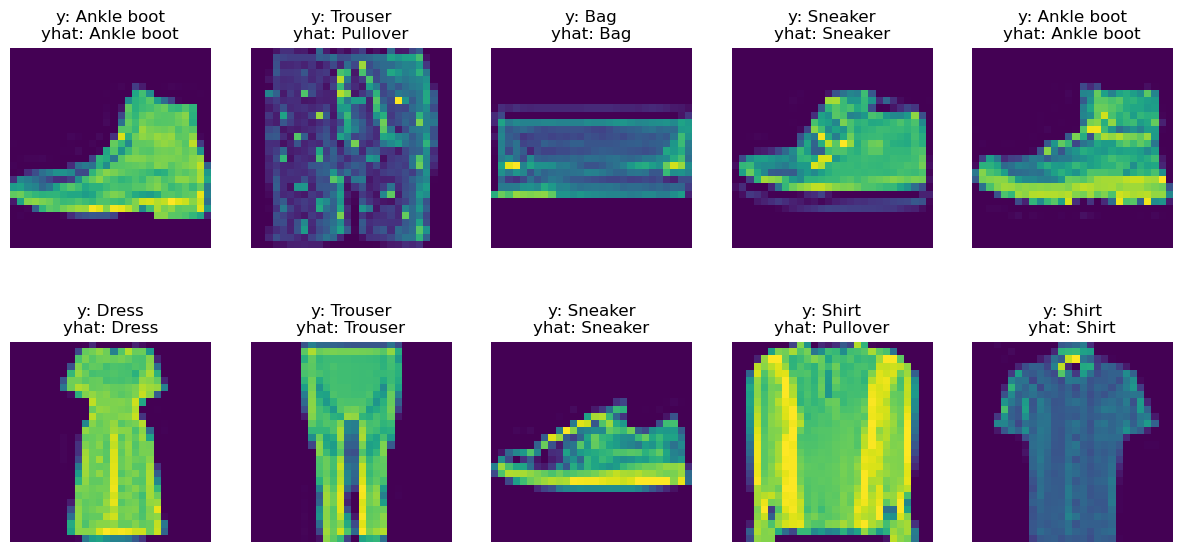

In [11]:
fig, axs = plt.subplots(2, 5, figsize=(15, 7))
axs = axs.flatten()

for ax, img, target, pred in zip(axs, X_test, y_test, yhat):
    ax.title.set_text(f'y: {dic[target]}\nyhat: {dic[pred]}')    
    ax.imshow(img.reshape((28, 28)))
    ax.axis('off')